In [ ]:
# dataset link
#https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download

In [1]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, Dropout, Rescaling, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#trian image loading #224
train_data = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
#validation image loading
val_data = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
# # Define Rescaling Layer
# rescale_layer = Rescaling(1./255)

# # Apply Rescaling During Training
# train_data = train_data.map(lambda x, y: (rescale_layer(x), y))
# val_data = val_data.map(lambda x, y: (rescale_layer(x), y))

In [70]:
#building the model
model = Sequential()

# Add Rescaling Layer as the first layer
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))

# Convolutional Block 1
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
# model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

# Convolutional Block 2
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

# Convolutional Block 3
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

# Convolutional Block 4
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Dropout(0.3))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=38, activation='softmax')) 

In [71]:
#compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
#summery of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 128)      

In [73]:
#training the model
training_history = model.fit(x=train_data, validation_data=val_data, epochs=10, verbose=1)

Epoch 1/10
2197/2197 [==============================] - 921s 418ms/step - loss: 1.2849 - accuracy: 0.6192 - val_loss: 0.4306 - val_accuracy: 0.8588
Epoch 2/10
2197/2197 [==============================] - 801s 364ms/step - loss: 0.4606 - accuracy: 0.8521 - val_loss: 0.2208 - val_accuracy: 0.9254
Epoch 3/10
2197/2197 [==============================] - 839s 381ms/step - loss: 0.3119 - accuracy: 0.8993 - val_loss: 0.2025 - val_accuracy: 0.9320
Epoch 4/10
2197/2197 [==============================] - 802s 364ms/step - loss: 0.2454 - accuracy: 0.9207 - val_loss: 0.1558 - val_accuracy: 0.9475
Epoch 5/10
2197/2197 [==============================] - 802s 364ms/step - loss: 0.2046 - accuracy: 0.9330 - val_loss: 0.1293 - val_accuracy: 0.9575
Epoch 6/10
2197/2197 [==============================] - 797s 362ms/step - loss: 0.1758 - accuracy: 0.9422 - val_loss: 0.1870 - val_accuracy: 0.9393
Epoch 7/10
2197/2197 [==============================] - 804s 365ms/step - loss: 0.1604 - accuracy: 0.9478 - val_

In [74]:
#Training accuracy
train_loss, train_acc = model.evaluate(train_data)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 650s 295ms/step - loss: 0.0343 - accuracy: 0.9895
Training accuracy: 0.9895440936088562


In [75]:
#Validation accuracy
val_loss, val_acc = model.evaluate(val_data)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 169s 303ms/step - loss: 0.1198 - accuracy: 0.9644
Validation accuracy: 0.9643751382827759


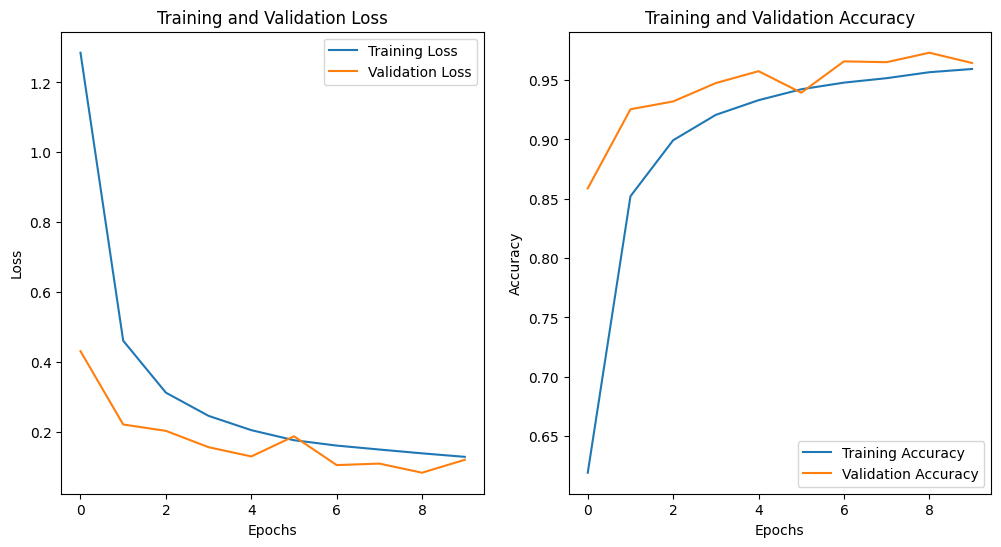

In [76]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [77]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_names = testing_set.class_names
print(class_names)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [78]:
predictions = model.predict(testing_set)
predicted_categories = tf.argmax(predictions, axis=1)

550/550 [==============================] - 16s 27ms/step


In [79]:
true_cat = tf.concat([y for x, y in testing_set], axis=0)
true_categories = tf.argmax(true_cat, axis=1)

In [80]:
true_categories.numpy()

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [81]:
predicted_categories.numpy()

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [25]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(true_categories, predicted_categories), tf.float32))
print(f'Accuracy: {accuracy.numpy() * 100}%')

Accuracy: 96.79604172706604%


In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)

In [83]:
# Precision, Recall, & Fscore
print(classification_report(true_categories,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

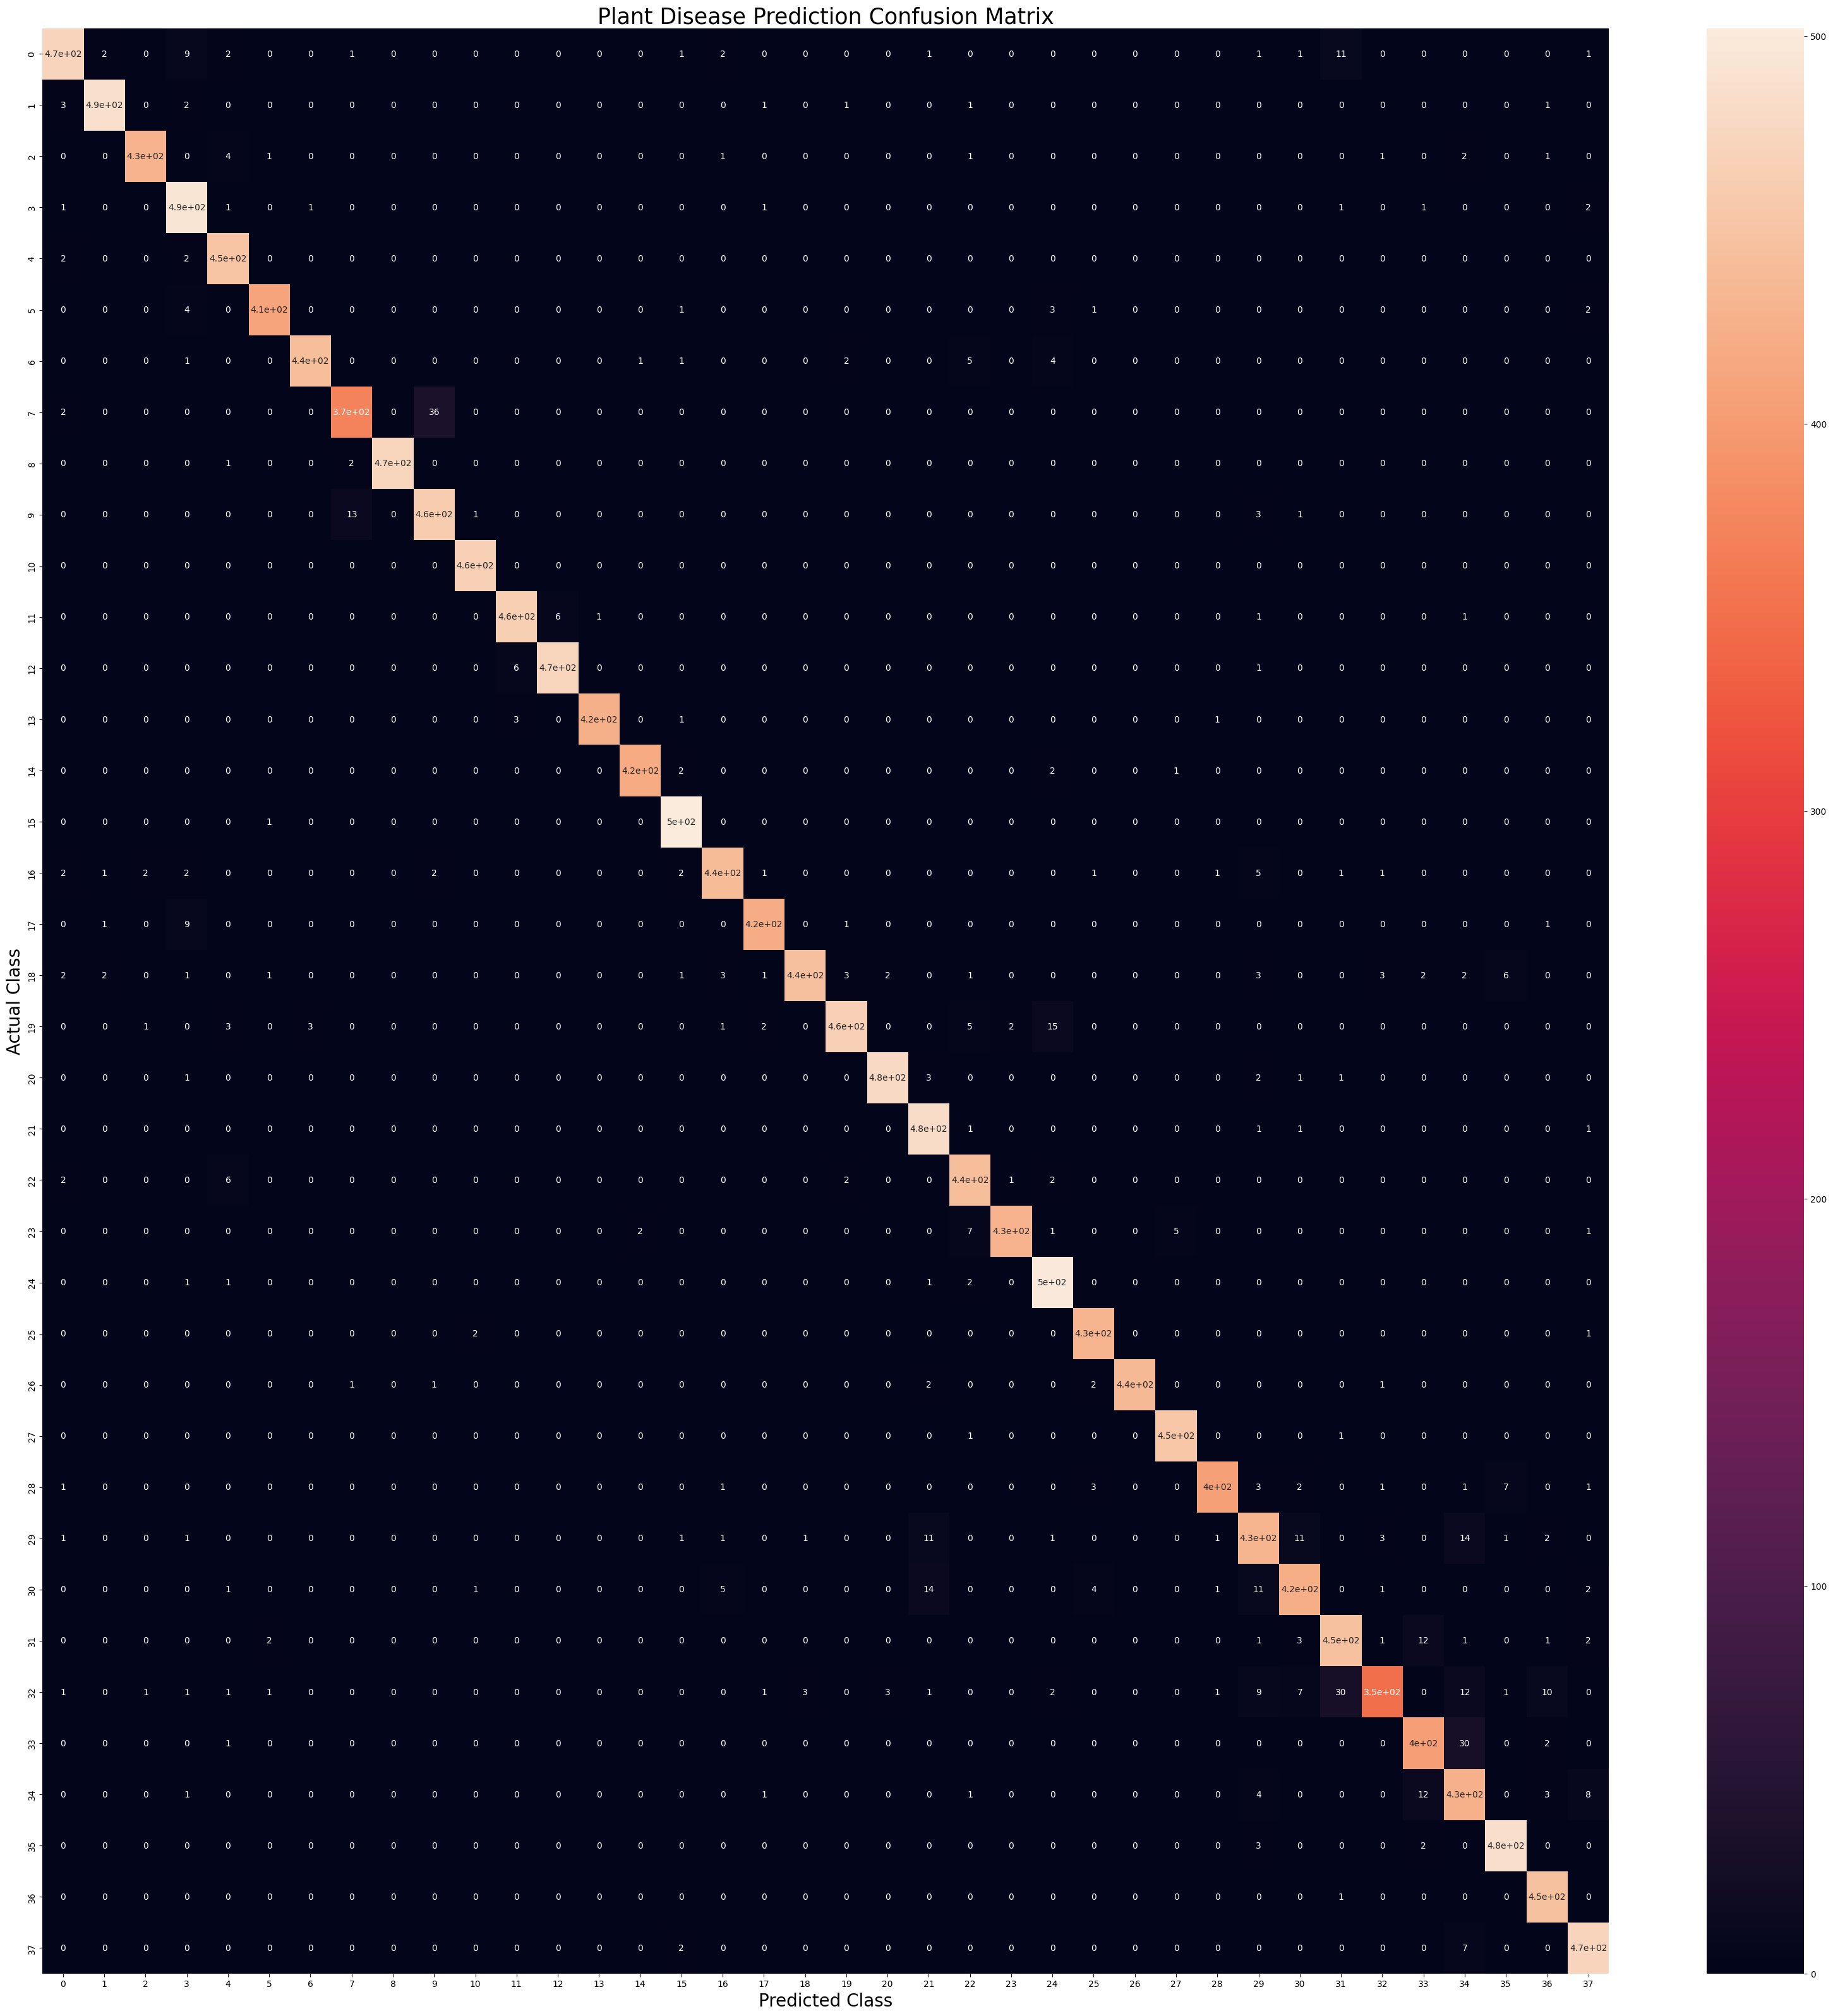

In [84]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [85]:
#saving the model
model.save('plant_disease_detection_model.keras')

In [86]:
#libraries for model to run
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [54]:
# Save class names to a text file
# with open('class_names.txt', 'w') as file:
#     for class_name in testing_set.class_names:
#         file.write(f"{class_name}\n")

In [87]:
#loading the model
cnn_model = tf.keras.models.load_model('plant_disease_detection_model.keras')

In [88]:
# Load class names from the file
with open('class_names.txt', 'r') as file:
    loaded_class_names = [line.strip() for line in file]

print(loaded_class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

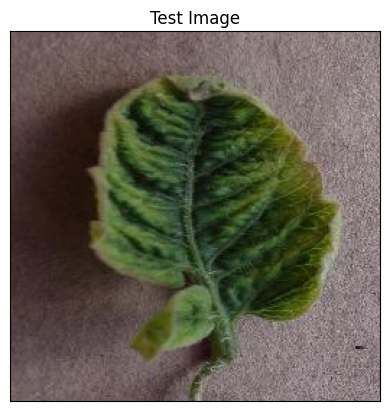

In [239]:
#Test Image Visualization
image_path = 'test/TomatoYellowCurlVirus2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [240]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn_model.predict(input_arr)

1/1 [==============================] - 0s 25ms/step


In [241]:
print(predictions)

[[3.60208814e-29 2.00120296e-30 3.79593494e-23 8.77611416e-18
  3.52677307e-23 7.56757106e-23 0.00000000e+00 1.31214498e-31
  0.00000000e+00 1.59096583e-28 1.33986337e-31 1.18574566e-23
  3.72825635e-23 6.38743497e-21 4.33808667e-31 5.76280975e-18
  1.25620981e-24 5.60722372e-31 9.32158001e-19 5.08615323e-23
  6.93068768e-37 1.95700795e-16 6.79266732e-23 4.37827939e-19
  1.53347056e-20 4.36108262e-24 3.91188944e-24 1.05179225e-29
  8.53451710e-16 8.01871139e-11 1.76802373e-15 1.84915170e-15
  2.14828483e-18 5.93753449e-11 7.20484273e-13 1.00000000e+00
  3.41429810e-19 6.30719361e-21]]


In [242]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


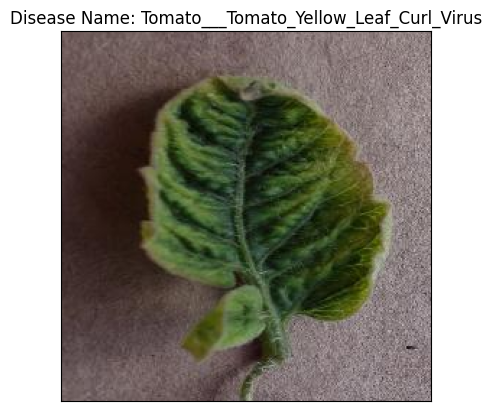

In [243]:
# Displaying the disease prediction
model_prediction = loaded_class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()